In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv


In [30]:
url = 'https://raw.githubusercontent.com/Jneny/Hospitalcapacity/main/Data/icu_beds.csv'
data = read_csv(url, header=0, parse_dates=[0], index_col=0)
data = data.asfreq('d')
adultcrit = pd.DataFrame(data, columns=['adult_icu_crci_patients'])
sadultcrit = pd.Series(adultcrit.adult_icu_crci_patients)

In [31]:
size = int(len(adultcrit)*.8)
adtrain = adultcrit.iloc[:size]
adtest = adultcrit.iloc[size:]

In [32]:
model_whole = sm.tsa.ARIMA(adtrain, order = (1,1,1))
result_whole = model_whole.fit()

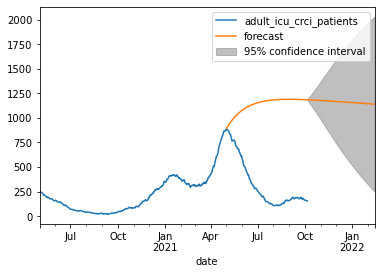

In [33]:
# fig = result_whole.predict(start = '2020-05-02', end = "2022-02-14", dynamic=True)

fig, ax = plt.subplots()
ax = adtrain.loc['2020-05-02':].plot(ax=ax)
fig = result_whole.plot_predict(start = '2021-05-02', end = "2022-02-14", dynamic=True, ax=ax, plot_insample=False)
plt.show()

In [34]:
predictions = result_whole.predict(start = '2021-10-07', end = "2022-02-14")

In [35]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [36]:
print(f'Mean Absolute Error = {mean_absolute_error(adtest,predictions)}')
print(f'Mean Squared Error = {mean_squared_error(adtest,predictions)}')

Mean Absolute Error = 262.7495158089623
Mean Squared Error = 98198.84100048018


In [20]:
# def mean_absolute_percentage_error(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
# adtrain.index

In [26]:
# adtest.head()
# adtest.tail()

,adult_icu_crci_patients
date,
2022-02-10,442
2022-02-11,429
2022-02-12,407
2022-02-13,395
2022-02-14,386
